In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [2]:
X = np.array([[0,0],[0,1],[1,0],[1,1]], dtype=float)
y = np.array([[0],[0],[0],[1]], dtype=float)


In [3]:
model = Sequential([
    Dense(4, input_dim=2, activation='relu'),  # hidden layer (1)
    Dense(1, activation='sigmoid')  # output for binary
])

model.compile(optimizer=Adam(learning_rate=0.1), loss='binary_crossentropy', metrics=['accuracy'])

e:\University\Semster 5\AI Lab\venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
history = model.fit(X, y, epochs=500, verbose=0)

In [5]:
loss, acc = model.evaluate(X, y, verbose=0)
print(f'Loss: {loss:.4f}, Accuracy: {acc:.4f}')
preds = (model.predict(X) > 0.5).astype(int)
print("Inputs:\n", X)
print("Predictions:\n", preds.flatten())
print("Actual:\n", y.flatten())

Loss: 0.0012, Accuracy: 1.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Inputs:
 [[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Predictions:
 [0 0 0 1]
Actual:
 [0. 0. 0. 1.]


In [6]:
#q2
np.random.seed(42)
x = np.linspace(-3, 3, 100)
noise = np.random.normal(0, 1.0, size=x.shape) * 0.5
y = x**2 + noise

In [7]:
X = x.reshape(-1,1)
Y = y.reshape(-1,1)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [9]:
def build_model(hidden_neurons=10):
    m = Sequential([
        Dense(hidden_neurons, input_dim=1, activation='relu'),
        Dense(1)
    ])
    m.compile(optimizer=Adam(0.01), loss='mse', metrics=['mae'])
    return m

In [10]:
model = build_model(10)
history = model.fit(X_train, y_train, epochs=500, verbose=0, validation_data=(X_test, y_test))


In [11]:
pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


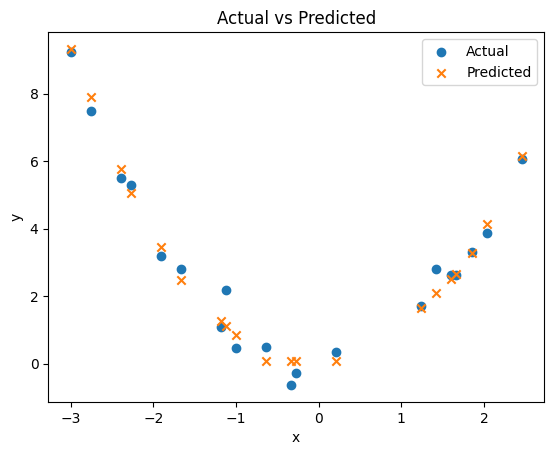

In [12]:
import matplotlib.pyplot as plt
plt.scatter(X_test, y_test, label='Actual')
plt.scatter(X_test, pred, label='Predicted', marker='x')
plt.legend(); plt.xlabel('x'); plt.ylabel('y'); plt.title('Actual vs Predicted')
plt.show()

e:\University\Semster 5\AI Lab\venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training with sigmoid...

Training with tanh...

Training with relu...


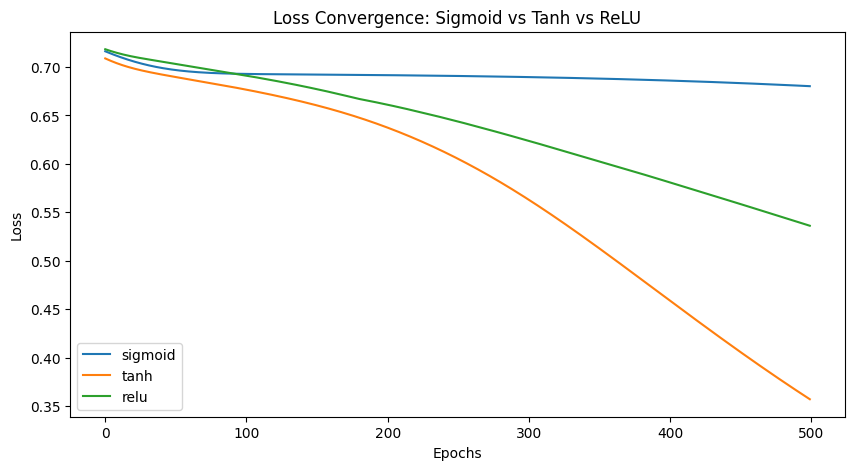

In [17]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# 1. XOR Dataset
X_xor = np.array([[0,0], [0,1], [1,0], [1,1]])
y_xor = np.array([[0], [1], [1], [0]])

activations = ['sigmoid', 'tanh', 'relu']
history_dict = {}

# 2. Train with different activations
for act in activations:
    model = Sequential([
        Dense(8, input_dim=2, activation=act),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    print(f"\nTraining with {act}...")
    h = model.fit(X_xor, y_xor, epochs=500, verbose=0)
    history_dict[act] = h.history['loss']

# 3. Plot Convergence Speed (Loss)
plt.figure(figsize=(10,5))
for act in activations:
    plt.plot(history_dict[act], label=act)
plt.title('Loss Convergence: Sigmoid vs Tanh vs ReLU')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Discussion: 
# ReLU usually converges fastest. 
# Sigmoid might be slower due to "vanishing gradient" problem.

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# 1. Load the CSV
df_cancer = pd.read_csv('breast_cancer.csv')

# 2. Identify Features and Target
# Maan lete hain ke 'diagnosis' ya last column target hai
# Agar column ka naam 'diagnosis' hai toh niche wali line check karein:
X = df_cancer.iloc[:, :-1] # Saare features
y = df_cancer.iloc[:, -1]  # Target column (Malignant/Benign)

# 3. Encode Target (Agar text mein hai: M/B -> 0/1)
le = LabelEncoder()
y = le.fit_transform(y)

# 4. Scale Features (ANN ke liye boht zaroori hai)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Split Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Data shape:", X_train.shape)
print("Preprocessing complete!")

Data shape: (24, 31)
Preprocessing complete!


In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the ANN model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)), # Input Layer
    Dense(8, activation='relu'),                                   # Hidden Layer
    Dense(1, activation='sigmoid')                                 # Output Layer (Binary)
])

# Compile Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train Model
print("Training starts...")
history = model.fit(X_train, y_train, epochs=50, validation_split=0.1, verbose=1)

Training starts...
Epoch 1/50


e:\University\Semster 5\AI Lab\venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.2857 - loss: 0.8190 - val_accuracy: 0.0000e+00 - val_loss: 1.2246
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.3333 - loss: 0.7910 - val_accuracy: 0.0000e+00 - val_loss: 1.1706
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.3810 - loss: 0.7649 - val_accuracy: 0.0000e+00 - val_loss: 1.1161
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.3810 - loss: 0.7417 - val_accuracy: 0.0000e+00 - val_loss: 1.0586
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.4286 - loss: 0.7201 - val_accuracy: 0.0000e+00 - val_loss: 1.0050
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.4286 - loss: 0.7002 - val_accuracy: 0.0000e+00 - val_loss: 0.9524
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.5714 - loss: 0.6815 - val_accuracy: 0.0000e+00 - val_loss: 0.9014
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.6190 - loss: 0.6633 - val_accuracy: 0.33

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.8333 - loss: 0.2603

Test Accuracy: 83.33%


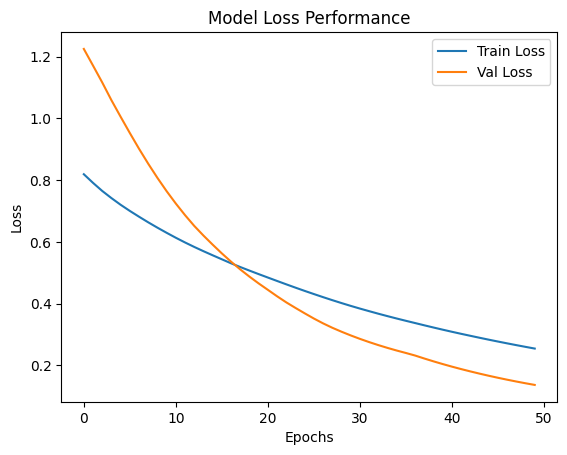

In [20]:
import matplotlib.pyplot as plt

# Evaluate on Test Data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {accuracy * 100:.2f}%")

# Plot Loss Curve
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss Performance')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# 1. Load the CSV
df_iris = pd.read_csv('Iris.csv')

# 2. Cleanup: Drop 'Id' if it's there
if 'Id' in df_iris.columns:
    df_iris = df_iris.drop('Id', axis=1)

# 3. Features and Target
X = df_iris.iloc[:, :-1].values # All columns except the last one
y = df_iris.iloc[:, -1].values  # The 'Species' column

# 4. Encode Species (Text to Numbers)
# e.g., Iris-setosa -> 0, Iris-versicolor -> 1, Iris-virginica -> 2
le = LabelEncoder()
y = le.fit_transform(y)

# 5. Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. Train-Test Split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Iris Classes:", le.classes_)
print("Preprocessing complete!")

Iris Classes: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
Preprocessing complete!


In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build Model
model_iris = Sequential([
    Dense(10, activation='relu', input_shape=(X_train.shape[1],)), # Hidden Layer 1
    Dense(10, activation='relu'),                                   # Hidden Layer 2
    Dense(3, activation='softmax')                                 # Output (3 Classes)
])

# Compile Model
# Since y is integers (0,1,2), we use sparse_categorical_crossentropy
model_iris.compile(optimizer='adam', 
                   loss='sparse_categorical_crossentropy', 
                   metrics=['accuracy'])

# Train Model
print("Training Iris Neural Network...")
history = model_iris.fit(X_train, y_train, epochs=100, verbose=0) # verbose=0 hides long output

# Evaluate
loss, acc = model_iris.evaluate(X_test, y_test)
print(f"\nIris Model Accuracy: {acc*100:.2f}%")

e:\University\Semster 5\AI Lab\venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training Iris Neural Network...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step - accuracy: 1.0000 - loss: 0.1272

Iris Model Accuracy: 100.00%


In [23]:
# Predict on the first 5 test samples
predictions = model_iris.predict(X_test[:5])
predicted_classes = np.argmax(predictions, axis=1)

print("Actual Labels:   ", y_test[:5])
print("Predicted Labels:", predicted_classes)
print("Species Names:   ", le.inverse_transform(predicted_classes))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Actual Labels:    [1 0 2 1 1]
Predicted Labels: [1 0 2 1 1]
Species Names:    ['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor']


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Load the CSV
df_house = pd.read_csv('house.csv')

# 2. Features and Target
# Maan lete hain ke 'price' column last mein hai
X = df_house.iloc[:, :-1].values # All features
y = df_house.iloc[:, -1].values  # House Price

# 3. Scaling (Neural Networks ke liye boht zaroori hai)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Split 80% Train, 20% Test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Data loaded and scaled successfully!")

Data loaded and scaled successfully!


In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build Model
model_house = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)), # Hidden Layer 1
    Dense(32, activation='relu'),                                   # Hidden Layer 2
    Dense(1)                                                       # Output (No activation for regression)
])

# Compile Model
# Regression ke liye loss 'mse' (Mean Squared Error) use hota hai
model_house.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train Model
print("Training Regression Model...")
history = model_house.fit(X_train, y_train, epochs=50, validation_split=0.2, verbose=1)

Training Regression Model...
Epoch 1/50


e:\University\Semster 5\AI Lab\venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 54607589376.0000 - mae: 216917.6250 - val_loss: 64723673088.0000 - val_mae: 238620.8750
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - loss: 54607577088.0000 - mae: 216917.5781 - val_loss: 64723652608.0000 - val_mae: 238620.8281
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - loss: 54607564800.0000 - mae: 216917.5469 - val_loss: 64723632128.0000 - val_mae: 238620.7812
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 54607544320.0000 - mae: 216917.5000 - val_loss: 64723615744.0000 - val_mae: 238620.7344
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - loss: 54607532032.0000 - mae: 216917.4531 - val_loss: 64723591168.0000 - val_mae: 238620.6875
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 54607523840.0000 - mae: 216917.4375 - val_loss: 64723570688.0000 - val_mae: 238620.6406
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - loss: 54607499264.0000 - mae: 216917.4219 - val_loss: 64723546112.0000 - val_mae: 2386

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


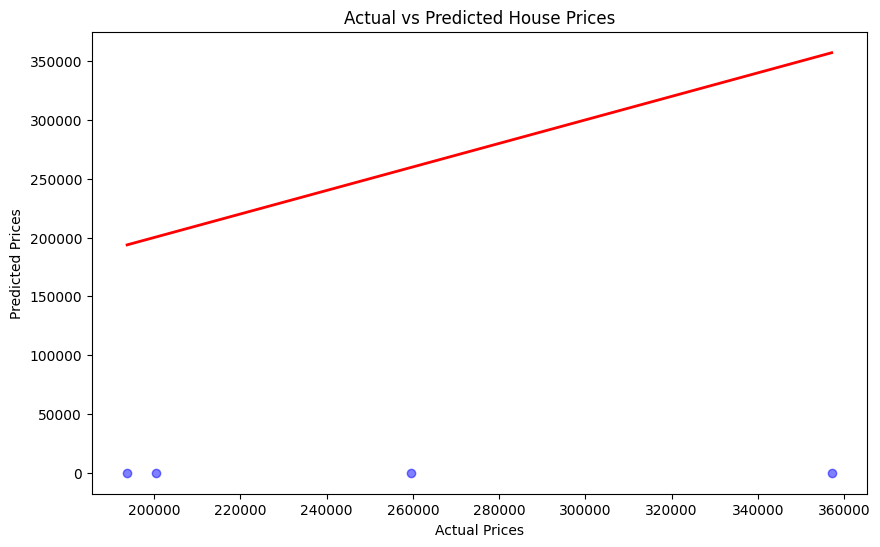

Mean Absolute Error: 252739.06


In [26]:
import matplotlib.pyplot as plt

# Predict prices
predictions = model_house.predict(X_test)

# Plot Actual vs Predicted
plt.figure(figsize=(10,6))
plt.scatter(y_test, predictions, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2) # Diagonal line
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()

# Mean Absolute Error dekhein
mae = model_house.evaluate(X_test, y_test, verbose=0)[1]
print(f"Mean Absolute Error: {mae:.2f}")